In [25]:
import pandas as pd
import numpy as np
import os

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

import plotly.graph_objs as go
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('./dataset/MBTI_train.csv', header = None)
data.columns = ['MBTI', '400words']
data['400words'] = data['400words'].str.lower()
data

,MBTI,400words
0,INTP,say process model list like subscriber channel...
1,INFJ,upon much manipulate retail finish like sacrif...
2,INFJ,fit yes certain bff social feel goal go know n...
3,INTJ,complete love within someone ideal joke solvea...
4,ENTJ,public strictly thing person x question person...
...,...,...
74352,INTP,get consequence process life back kind great b...
74353,ENFP,mundane really right vibe natural u conscious ...
74354,INFP,diva message remember practical lot absorb tel...
74355,INTJ,increase impressive group make recognize get a...


In [19]:
"""
nlp = spacy.load('en_core_web_sm')
data['nlp_words'] = np.nan

for i in range(len(data)):
    data['nlp_words'][i] = nlp(data['400words'][i])
    if i % 1000 == 0:
        print("*")
"""

'\nnlp = spacy.load(\'en_core_web_sm\')\ndata[\'nlp_words\'] = np.nan\n\nfor i in range(len(data)):\n    data[\'nlp_words\'][i] = nlp(data[\'400words\'][i])\n    if i % 1000 == 0:\n        print("*")\n'

In [16]:
# data.to_csv('./new_data.csv')

In [17]:
"""
new_data = pd.read_csv('./new_data.csv')
if new_data['nlp_words'][0] == data['400words'][0]:
    print("헛짓거리")
"""

헛짓거리


C:\Users\Moon-yujin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


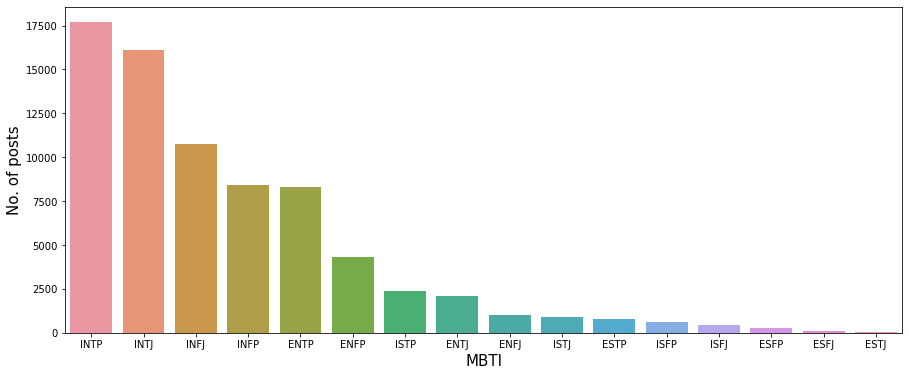

In [15]:
graph = data['MBTI'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(graph.index, graph.values, alpha=1)
plt.xlabel('MBTI', fontsize=15)
plt.ylabel('No. of posts', fontsize=15)
plt.show()

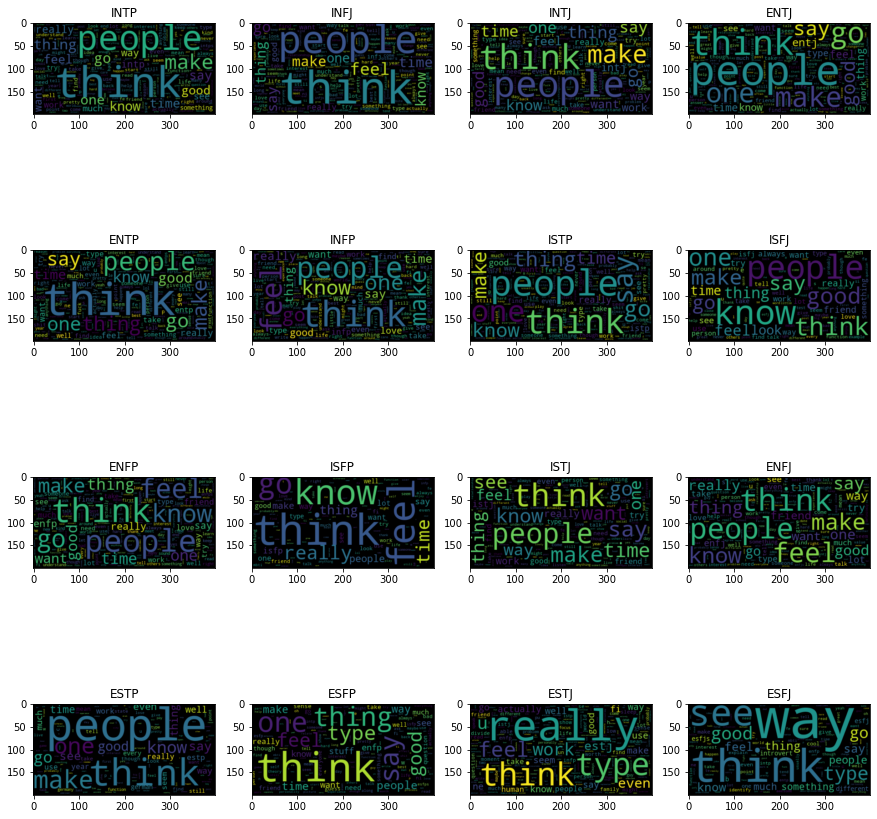

In [16]:
fig, ax = plt.subplots(len(data['MBTI'].unique()), sharex=True, figsize=(15,len(data['MBTI'].unique())))
k = 0
for i in data['MBTI'].unique():
    mbti = data[data['MBTI'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(mbti['400words'].to_string())
    plt.subplot(4, 4, k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [4]:
X = data['400words']
y = data['MBTI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
vectorizer = TfidfVectorizer()
   
X_train_vector = vectorizer.fit_transform(X_train)
    
clf = LinearSVC()
clf.fit(X_train_vector, y_train)
    
estimators = [('tfidf',TfidfVectorizer()),('clf',LinearSVC())]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [7]:
pred1 = pipe.predict(X_test)
accuracy_score(y_test, pred1)

0.7892011834319527

In [26]:
estimators2 = [('tfidf',TfidfVectorizer()),('lgs', LogisticRegression())]
pipe2 = Pipeline(estimators2)
pipe2.fit(X_train, y_train)

C:\Users\Moon-yujin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lgs', LogisticRegression())])

In [27]:
pred2 = pipe2.predict(X_test)
accuracy_score(y_test, pred2)

0.7829478214093599

In [22]:
nb = MultinomialNB()
nb.fit(X_train_vector, y_train)
estimators3 = [('tfidf',TfidfVectorizer()),('nb', MultinomialNB())]
pipe3 = Pipeline(estimators3)
pipe3.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [21]:
pred3 = pipe3.predict(X_test)
accuracy_score(y_test, pred3)

0.2943114577729962

In [23]:
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train_vector, y_train)
estimators4 = [('tfidf',TfidfVectorizer()),('nb', LogisticRegression())]
pipe4 = Pipeline(estimators4)
pipe4.fit(X_train, y_train)
pred4 = pipe4.predict(X_test)
accuracy_score(y_test, pred4)

C:\Users\Moon-yujin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Moon-yujin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.7829478214093599

In [26]:
Dtree = DecisionTreeClassifier(max_depth=14)
Dtree.fit(X_train_vector, y_train)
estimators5 = [('tfidf',TfidfVectorizer()),('Dtree', DecisionTreeClassifier())]
pipe5 = Pipeline(estimators5)
pipe5.fit(X_train, y_train)
pred5 = pipe5.predict(X_test)
accuracy_score(y_test, pred5)

0.5585664335664335

In [ ]:
Rforest = RandomForestClassifier(max_depth=10)
Rforest.fit(X_train_vector, y_train)
estimators4 = [('tfidf',TfidfVectorizer()),('Rforest', RandomForestClassifier())]
pipe4 = Pipeline(estimators4)
pipe4.fit(X_train, y_train)
pred4 = pipe4.predict(X_test)
accuracy_score(y_test, pred4)
# 0.46806078536847767

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_vector, y_train)
estimators5 = [('tfidf',TfidfVectorizer()),('xgb', XGBClassifier())]
pipe5 = Pipeline(estimators5)
pipe5.fit(X_train, y_train)
pred5 = pipe4.predict(X_test)
accuracy_score(y_test, pred5)
# 0.7225658956428187

In [ ]:
estimator = LinearSVC()
n_estimators = 10
n_jobs = 1
model = BaggingClassifier(base_estimator=estimator,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs)

estimators = [SVC(), LinearSVC(),
              BaggingClassifier(SVC(), n_estimators=10, max_samples=0.1, n_jobs=1),
              BaggingClassifier(LinearSVC(), n_estimators=10, max_samples=0.1, n_jobs=1),
              BaggingClassifier(SVC(), n_estimators=10, max_samples=0.1, n_jobs=10),
              BaggingClassifier(LinearSVC(), n_estimators=10, max_samples=0.1, n_jobs=10)]

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=16)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lgs),('KNN',knn_clf)] , voting='soft' )

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred6 = vo_clf.predict(X_test)
accuracy_score(y_test , pred6)
# 0.7390

In [8]:
testData = pd.read_csv('./dataset/MBTI_test.csv', header = None)
testData.columns = ['400words']
testData

,400words
0,get accept ya bite well stop important open lo...
1,offer rebel something war people friend block ...
2,soulmates contradiction easy basic recurrence ...
3,run nature q test let sound sarcastically irri...
4,hour fast fast suspend see strict wampum eight...
...,...
9332,increase thing liquor analyze partner consider...
9333,senior vote wide shame learn talk problem broo...
9334,want relate top understand think read generate...
9335,alot set intjs soooo alone ease cherish anothe...


In [9]:
testData['400words'] = testData['400words'].str.lower()

In [10]:
f = open('./R1_team20.txt', 'w')

for i in range(len(testData)):
    predictions2 = pipe.predict([testData['400words'][i]])
    pred = str(predictions2).strip("[" "]" "'")
    f.write(pred)
    if i+1 < len(testData):
        f.write('\n')
    f.close

KeyboardInterrupt: 

In [27]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
